# Data Visualization

Note: This lesson is better presented as a Jupyter Notebook because of all the plots we're going to make!

For the plots in this lesson, we will be using a mixture of `matplotlib` and `seaborn`. `seaborn` is a library of functions that simplifies the plotting code when we're dealing with data frames from the `pandas` library. However, it's very often that you'll need to use matplotlib functions to fine tune the plot you want, so going forward you'll want to learn both. 

As usual, follow the rules of learning: no copy/paste, inspect the results, save often, try to break it, and write down explanations (comments) for each function as if you're teaching it to others. 

## Learning Outcomes

- Recognize the various visualizations that can be used for your data, and when they are applicable.
- Appreciate the importance of plotting data before doing any modelling.
- Critique various visualizations, including recognizing misleading visualizations and appreciating insightful visualizations

![](figs/statistics.png)

## Example Data: StackOverflow Survey Results

StackOverflow is a website where users can ask questions and they get answered by some very generous people. Back in the old days of code, you had to figure everything out based on the manuals and piece it together based on other people's code and trial and error. These days, you just ask friendly strangers on the internet. Some of the old folks think this is the easy way out, but I think of it as standing on the shoulders of giants. I suggest you make constant use of it!

Every year, StackOverflow send out a survey to their users. You can see their summary of this data [here](https://insights.stackoverflow.com/survey/2019). They make this data available for download so that anyone can do their own analysis!

The data are relatively large (but nowhere close to Big Data), so we've gone ahead and cut it down a bit. We've taken only the rows where the respondant has either an academic job or a job involving data. 

In this block of code, we import the relevant packages and load in the data set using `pandas`.


In [2]:
import numpy as np
import seaborn as sns
sns.set_style("whitegrid") # Makes all the plots a little prettier
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats # mean(), sd(), etc.

so = pd.read_csv("../data/stackOverflowSurveyResults.csv")

# Here are all of the column names
# print(so.columns) # Two useless columns: 
so = so.drop(columns = ["Unnamed: 0", "X"])
print(so.columns)
print("Number of rows: ", so.size)


Index(['Respondent', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'EduOther', 'DevType', 'YearsCodePro', 'CareerSat',
       'JobSat', 'MgrIdiot', 'ConvertedComp', 'CodeRev', 'CodeRevHrs',
       'UnitTests', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'PlatformWorkedWith', 'DevEnviron', 'OpSys', 'SocialMedia',
       'Extraversion', 'SOVisitFreq', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Dependents', 'Python', 'R'],
      dtype='object')
Number of rows:  906144


Before we begin, there are a few things to clean up. In particular, the `JobSat` and `MgrIdiot` columns are *ordinal* variables; they are names but there's a natural ordering to them. 

This code is a little bit confusing, so take your time going through it. Which parts are names of columns, which are values within a variable, which are names of objects, which are methods, and which are arguments? What happens if JobSatOrder has values that aren't in JobSat, or if JobSatOrder is missing values that are in JobSat?

In [3]:
so["JobSat"] = so["JobSat"].astype("category")
JobSatOrder = ["Very dissatisfied", "Slightly dissatisfied",
    "Neither satisfied nor dissatisfied", "Slightly satisfied",
    "Very satisfied"]
so["JobSat"].cat.reorder_categories(JobSatOrder, inplace = True)

so["MgrIdiot"] = so["MgrIdiot"].astype("category")
MgrIdiotOrder = ["Not at all confident",
    "Somewhat confident", "Very confident", "I don't have a manager"]
so["MgrIdiot"].cat.reorder_categories(MgrIdiotOrder, inplace = True)

Before we go on, you should get an idea of what the data looks like. Feel free to use the following code block to determine what each column looks like (we've added a few examples to get you started):

In [4]:
print("Job Satisfaction:") 
print(so.JobSat[0:5]) # First 5 observations from JobSat
print("\nManager Confidence:") # Note: The leading \n adds a new line before the text
print(set(so.MgrIdiot))# all of the unique values in the "Manager Confidence" column
print("\nGender Summary:")
print(so.Gender.value_counts())
print("\nAge Range: ")
print(min(so.Age), max(so.Age))
print("\nCompensation (converted to USD, contains giant outliers)")
print(so.ConvertedComp.mean(), so.ConvertedComp.std())
#...

Job Satisfaction:
0    Slightly dissatisfied
1       Slightly satisfied
2                      NaN
3       Slightly satisfied
4    Slightly dissatisfied
Name: JobSat, dtype: category
Categories (5, object): ['Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Very satisfied']

Manager Confidence:
{nan, 'Somewhat confident', 'Very confident', "I don't have a manager", 'Not at all confident'}

Gender Summary:
Man                                                            25294
Woman                                                           1700
Non-binary, genderqueer, or gender non-conforming                221
Man;Non-binary, genderqueer, or gender non-conforming             66
Woman;Non-binary, genderqueer, or gender non-conforming           57
Woman;Man                                                         57
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

Age Range: 
1.0 99.0

C

In the next code block, we investigate Python usage among the respondants. `PyTrue` is a "series" (a collection of named numbers). This series was created by first taking only the rows of so where `Python` is equal to `True` (i.e. where the respondent listed Python as a language they use), then finds the mean of each column. `PyFalse` is the same, but only the rows where `Python` is `False`. 

In [5]:
# Some basic stats
#print(so[so.Python == True].mean(), so[so.Python == False].mean())
#so[so.Python == True].mean()
#so[so.Python == False].mean())
PyTrue = pd.Series(so[so.Python == True].mean(), name = "Uses Python")
PyFalse = pd.Series(so[so.Python == False].mean(), name = "Doesn't use Python")
pd.concat([PyTrue, PyFalse], axis = 1)


,Uses Python,Doesn't use Python
Respondent,43927.589264,44432.883874
ConvertedComp,147410.061463,121795.266254
CodeRevHrs,5.129623,5.774078
Age,30.801861,32.899740
Python,1.000000,0.000000
R,0.148418,0.038234


- The "Respondents" column is just an ID number, so ignore that row in the output.
- It seems that academics/data scientists who replied to the poll and know Python make more money than academics/data scientists who replied to the poll and don't know Python
    - It's not a scientific poll, so we have to be careful about our wording here.
- It also seems that Python programmers who answered the poll spend less time looking over their code. You should try to be better than that.
- Python programmers who answer the poll tend to be younger (and likely hipper, but the data don't show that it's just from my personal knowledge).
- Python programmers who answered the poll also tend to know R more than non-Python programmers. This is irrelevant to the rest of this lesson, but my (Devan's) native language is R and I miss a lot of it's features. 
    - There's a big debate in data science about R versus Python. The solution will always depend on context. I think it's uncontroversial to say that learning Python is a good thing.

There's only so much you can learn from the numeric summaries. Min/max, mean, sd, and median are all very important, but you don't know your data until you've seen it!

For our first plot, let's look at a histogram. The one below shows the age of the respondents. As you can see, this distribution is right-skewed, with most of the respondents being betwem 20 and 40 years old. 

I've also added a density curve (aka Kernel Density Estimate, or kde). This is basically a way to smooth the bars of the histogram. The histogram gives us the best idea of the shape of our data, but density curves can be very useful for comparison (which histograms cannot do).

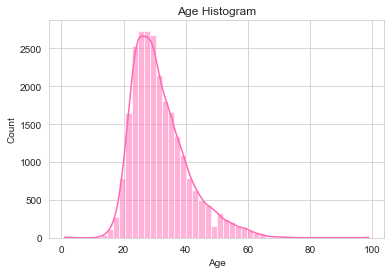

In [6]:
#help(sns.histplot)
sns.histplot(data = so, 
    x = "Age", # Choose the column
    bins = 50, # Change the number of bins (optional)
    kde = True, # Add a smoothed line (optional)
    color = "hotpink"
    )
plt.title("Age Histogram")

plt.show()

For categorical data, Bar Plots and Box Plots are ideal. A Bar plot is for one or two categorical variables, and a boxplot is for a continuous variable versus one or two (or three) categorical variables.

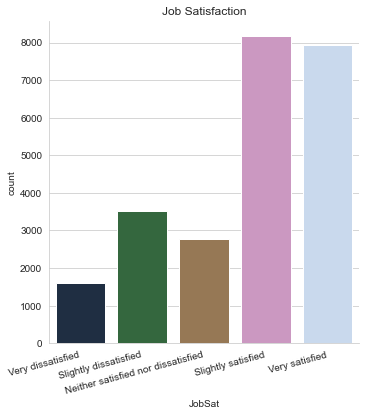

In [7]:
# One barplot
sns.catplot(data = so, x = "JobSat", kind = "count", order = JobSatOrder, palette = "cubehelix")
plt.xticks(rotation = 15, horizontalalignment = "right") # Rotate x labels so they don't overlap
plt.title("Job Satisfaction")
plt.show()

In order to see how a continuous variable changes across the levels of a categorical variable, a boxplot is the go-to. In a boxplot, we plot the minimum, first quartile, median, 3rd quartile, and the maximum in order to see where most of the data is. Instead of the min/max, we often use a rule-of-thumb that is meant to identify outliers. 

In the plot below, the box shows the middle 50% (the first quartile to the third quartile) and the "whiskers" show the minimum values (since there are no outliers in the lower direction) and the 3rd quartiles plus 1.5 times the size of the box (this is the rule-of-thumb for outliers). Any dots above the upper whisker represent something that micht be considered an outlier. However, for this plot, I have removed anyone who makes more than $400,000 per year, so the quantiles must be interpreted in this context.

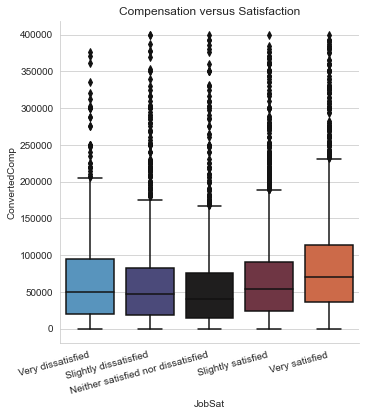

In [8]:
sns.catplot(data = so[so.ConvertedComp < 400000], kind = "box", x = "JobSat", y = "ConvertedComp", palette = "icefire")
plt.xticks(rotation = 15, horizontalalignment = "right") # Rotate x labels so they don't overlap
plt.title("Compensation versus Satisfaction")
plt.show()

A slightly better version of a box plot is shown below. It's called a *Violin Plot*, because with the right data they can look like violins. Instead of showing the 0, 1, 2, 3, and 4th quartiles, they show a sideways kernel density plot. This makes it easy to see where the "lumps" are, and we can easily compare across categories. The seaborn implementation also includes a boxplot in the middle of the violins, so you get the best of both!

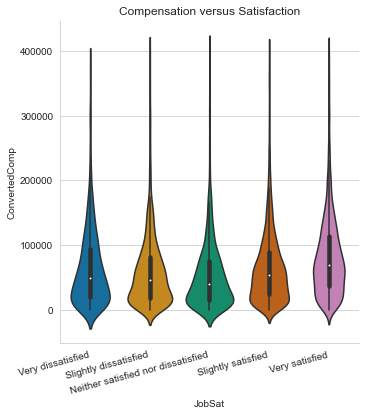

In [10]:
sns.catplot(data = so[so.ConvertedComp < 400000], kind = "violin", x = "JobSat", y = "ConvertedComp", palette = "colorblind")
plt.xticks(rotation = 15, horizontalalignment = "right") # Rotate x labels so they don't overlap
plt.title("Compensation versus Satisfaction")
plt.show()

It almost looks like people who make more are more satisfied with their job! It almost looks like people who are unsatisfied make more money (begrudgingly), but these are just explorations and we can't make any causal conclusions yet.

The final plot that we'll show in this section is a scatterplot. This only works for two continuous variables, but more complex versions can be written.

The takeaway message from the plot below is that there isn't much of a relationship between compensation and age and that many people round their wage to... 1 million or 2 million dollars? That can't be right.

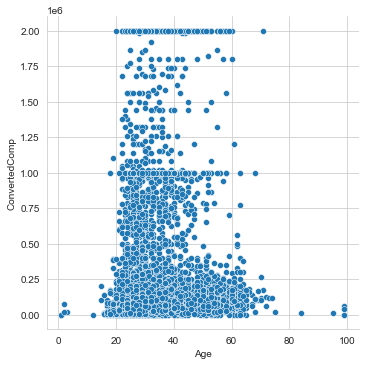

In [8]:
sns.relplot(data = so, x = "Age", y = "ConvertedComp")
plt.show()

In [23]:
# Investigate: do people really report compensation of 1 or two million?
# In this code, we round converted comp to -5 decimal places (i.e., nearest 100,000)
# and then count how many observations there are of each value
pd.crosstab(so.ConvertedComp.round(-5), columns = "ConvertedComp")

col_0,ConvertedComp
ConvertedComp,
0.0,8052
100000.0,7970
200000.0,1426
300000.0,201
400000.0,135
500000.0,84
600000.0,74
700000.0,87
800000.0,90


So, yes, people reported \$1 million and \$2 million, but the vast majority of the data rounds to 0, 100,000, or 200,000. The scatterplot is a little misleading (especially with Python's automatic use of scientific notation).

# 3D Pie Charts

Just no. Never use a 3D pie chart.

Pie charts should only be used to highlight how much bigger one thing is compared to the rest. That's it. 

William Cleveland, a statistician who literally wrote the book on visualization, introduced a concept called the **ink-to-data ratio:** the amount of ink used versus the amount information shown. This isn't something that you measure directly; it's a principle to keep in mind.

If you want to highlight how big one thing is compared to the rest, just show the numbers. You'll use much less ink that way. Basically every pie chart would be better as a table or a bar chart.

[This demonstration](https://www.darkhorseanalytics.com/blog/salvaging-the-pie) nicely shows how to make a better pie charts. Notice how much ink gets removed!

-----

# Some Principles of Data Visualization

- If it doesn't help you understand the data better, don't include it. 
- Each plot should be able to be explained in two or three sentences.
    - Don't cram too much information into one plot. People will get lost.
- Each plot is an argument. Make it clear what you're trying to say with the plot. 
- Titles are important. Labels are important. Units are important. 
    - Counter-intuitively, visualizations often need a lot of words.
- Colours should always be meaningful. Don't use multiple colours just because you like them.
- Approximately 10% of the population has some form of colourblindness. Red and green should **not** be used to distinguish categories. 
    - Orange, green, purple, and blue tend to be pretty good colours. Try to keep uniform brightness, or use brightness to indicate something.
    - If you need more than 6 or 7 colours, you're doing too much with colour and need to change. Try using other things (like point shape or line type) to distinguish your plot features.

For the most part, Seaborn (and MatPlotLib) makes it hard to violate these principles. Look back through the plots in this notebook and evaluate the plots. Many of the plots have different colours just to demonstrate changing colour schemes, but weren't necessary. The labels are just the names of the columns, which aren't something that the audience will care about, so change those to something meaningful (including units, where applicable).

# Adding Complications

In the next part of this lesson (which is optional!), we'll be making some more complicated plots. We'll move to side-by-side box plots (or bar plots), scatterplots with more colour, violin plots, and more!



